1.- Con las imágenes contenidas en la carpeta procésalas de manera que obtengan el 
siguiente resultado 

Primero leo las imagens en escala de grises
Binarizar la imagen ambas
luego juntar con wise

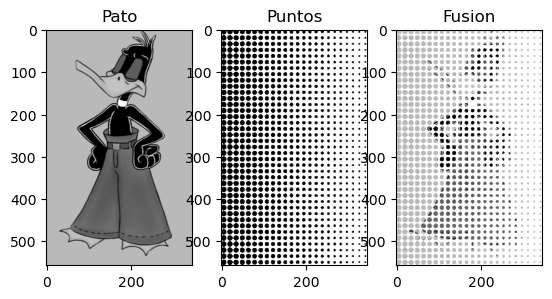

In [38]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

img = cv2.imread('pato.png', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('puntos.png', cv2.IMREAD_GRAYSCALE)

#Esta es la umbralizacion binaria en binario solo se trabajo entre 0  y 255
_,umbralbi = cv2.threshold(img2,127,255,cv2.THRESH_BINARY)


#alto, ancho = img.shape[:2]

#mascara = np.zeros_like(umbralbi)

img_fin = cv2.bitwise_or(img, umbralbi)



# Display original image
plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Pato')

plt.subplot(1, 3, 2)
plt.imshow(umbralbi, cmap='gray')
plt.title('Puntos')

plt.subplot(1, 3, 3)
plt.imshow(img_fin, cmap='gray')
plt.title('Fusion')

plt.show()


2.- Cuenta cuantos objetos de cada color se encuentran en la imagen  

Umbralizacion 
Filtros


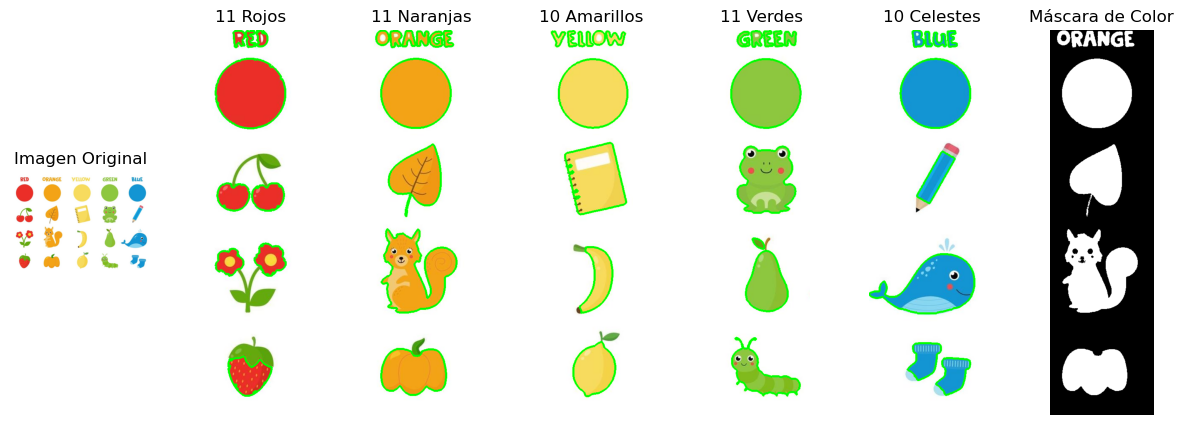

In [98]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt 
import skimage.measure as ms

def contar(img, color_min, color_max):
    
    img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    
    mascara = cv2.inRange(img_hsv, color_min, color_max)
    img_fin = cv2.bitwise_and(img, img, mask=mascara)

    img_gris = cv2.cvtColor(img_fin, cv2.COLOR_BGR2GRAY)

    #Esta es la umbralizacion binaria en binario solo se trabajo entre 0  y 255
    _, umbralbi = cv2.threshold(img_gris, 1, 255, cv2.THRESH_BINARY)
    
    borde, _ = cv2.findContours(umbralbi, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cont = len(borde)
    
    
    contornos = cv2.drawContours(img.copy(), borde, -1, (0, 255, 0), 3)

    return cont, contornos, umbralbi, mascara


imagen = cv2.imread('colores.jpg')


rojo_min = np.array([0, 50, 20])
rojo_max = np.array([10, 255, 255])

naranja_min = np.array([10, 100, 100])
naranja_max = np.array([25, 255, 255])

amarillo_min = np.array([22, 100, 100])
amarillo_max = np.array([35, 255, 255])

verde_min = np.array([35, 100, 100])
verde_max = np.array([85, 255, 255])

celeste_min = np.array([85, 100, 100])
celeste_max = np.array([105, 255, 255])


franjaRojo = imagen[50:1000, 40:250, :]

franjaNaranja = imagen[50:1000,300:550,:]

franjaAmarillo = imagen[50:1000,600:800,:]

franjaVerde = imagen[50:1000,850:1080,:]

franjaCeleste = imagen[50:1000,1085:1400,:]

img_cont, img_with_contours, img_binary, img_mask = contar(franjaRojo, rojo_min, rojo_max)
img_cont2, img_with_contours2, img_binary2, img_mask2 = contar(franjaNaranja, naranja_min, naranja_max)
img_cont3, img_with_contours3, img_binary3, img_mask3 = contar(franjaAmarillo, amarillo_min, amarillo_max)
img_cont4, img_with_contours4, img_binary4, img_mask4 = contar(franjaVerde, verde_min, verde_max)
img_cont5, img_with_contours5, img_binary5, img_mask5 = contar(franjaCeleste, celeste_min, celeste_max)

plt.figure(figsize=(15, 5))

plt.subplot(1, 7, 1)
plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(1, 7, 2)
plt.imshow(cv2.cvtColor(img_with_contours, cv2.COLOR_BGR2RGB))
plt.title(f'{img_cont} Rojos')
plt.axis('off')

plt.subplot(1, 7, 3)
plt.imshow(cv2.cvtColor(img_with_contours2, cv2.COLOR_BGR2RGB))
plt.title(f'{img_cont2} Naranjas')
plt.axis('off')

plt.subplot(1, 7, 4)
plt.imshow(cv2.cvtColor(img_with_contours3, cv2.COLOR_BGR2RGB))
plt.title(f'{img_cont3} Amarillos')
plt.axis('off')

plt.subplot(1, 7, 5)
plt.imshow(cv2.cvtColor(img_with_contours4, cv2.COLOR_BGR2RGB))
plt.title(f'{img_cont4} Verdes')
plt.axis('off')

plt.subplot(1, 7, 6)
plt.imshow(cv2.cvtColor(img_with_contours5, cv2.COLOR_BGR2RGB))
plt.title(f'{img_cont5} Celestes')
plt.axis('off')

plt.subplot(1, 7, 7)
plt.imshow(img_mask2, cmap='gray')
plt.title('Máscara de Color')
plt.axis('off')

plt.show()




3.- Estás trabajando en un proyecto de reconocimiento de rostros y necesitas detectar los 
bordes de las caras en las imágenes. Explique cómo aplicaría el operador de detección de 
bordes de Canny y aplícalo con un código en Python en jupyter

escala de grises
primeo aplico el guassiano 
cany

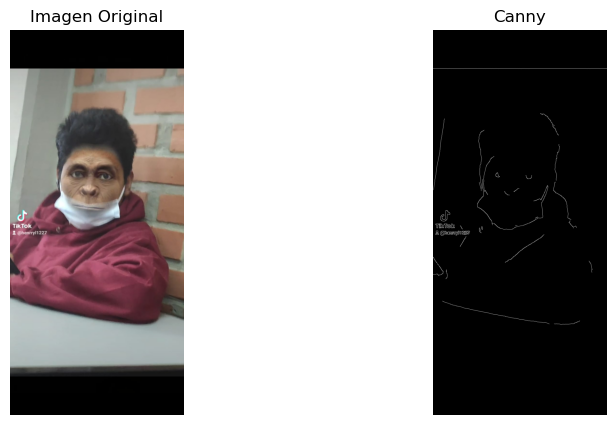

In [96]:
import cv2
import matplotlib.pyplot as plt

imagen = cv2.imread('Monin.jpeg')

img2 = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)

# Aplico Gaussiano para suavizar la imagen y reducir el ruido
gaussiano = cv2.GaussianBlur(img2, (5, 5), 1.4)

# Aplico Canny para detectar los bordes
cany = cv2.Canny(gaussiano, 50, 150)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Imagen Original')
plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Canny')
plt.imshow(cany, cmap='gray')
plt.axis('off')

plt.show()
